In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Personality.csv")

In [4]:
df.head()

,movie_preferences,social_media_activity,reading_habits,favorite_leisure_activities,music_taste,fashion_style,travel_preferences,personality_behaviour
0,Science Fiction,Fashion,Short Stories,Gaming,EDM,Casual,Road Trips,Complex
1,Mystery,Fashion,Novels,Sports,Classical,Sporty,Family Holidays,Complex
2,Mystery,Food,Comics,Sports,Jazz,Classic,Solo Travel,Complex
3,Comedy,Lifestyle,Short Stories,Drawing,Classical,Casual,Adventure,Versatile
4,Mystery,Lifestyle,Short Stories,Gaming,Classical,Vintage,Solo Travel,Complex


In [5]:
features = {
    'movie_preferences' : ['Action', 'Comedy', 'Mystery', 'Science Fiction'],
    'social_media_activity' : ['Lifestyle', 'Food', 'Fashion', 'Fitness', 'Games'],
    'reading_habits' : ['Novels', 'Short Stories','Comics'],
    'favorite_leisure_activities' : ['Drawing', 'Reading', 'Sports', 'Gaming'],
    'music_taste' : ['Rap', 'Jazz', 'Classical', 'EDM'], 
    'fashion_style' : ['Casual', 'Classic', 'Vintage', 'Sporty'],
    'travel_preferences' : ['Adventure', 'Road Trips', 'Solo Travel', 'Family Holidays']
}

label_encoders = {}
for feature in features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [7]:
X = df.drop(columns=['personality_behaviour'])
y = df['personality_behaviour']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = MultinomialNB()

In [10]:
clf.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Complex       0.70      1.00      0.83      1407
   Versatile       0.00      0.00      0.00       593

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



In [13]:
confusion_matrix(y_test, y_pred)

array([[1407,    0],
       [ 593,    0]], dtype=int64)

In [15]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1407    0]
 [ 593    0]]
Accuracy :  0.7035
Sensitivity :  1.0
Specificity :  0.0


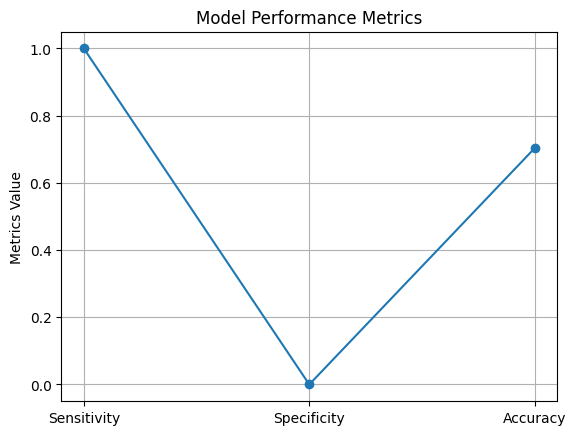

In [17]:
plt.plot(['Sensitivity', 'Specificity', 'Accuracy'], [sensitivity1, specificity1, accuracy1], marker='o')

# Adding labels and title
plt.title('Model Performance Metrics')
plt.ylabel('Metrics Value')

# Display the plot
plt.grid(True)
plt.show()

In [18]:
print("Precision Score: ", precision_score(y_test, y_pred, average='weighted', pos_label='Complex'))
print("Recall Score: ", recall_score(y_test, y_pred, pos_label='Complex'))
print("Accurcay Score: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label='Versatile'))

Precision Score:  0.49491225000000005
Recall Score:  1.0
Accurcay Score:  0.7035
F1-Score:  0.0
